In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('CNBC_score.csv')
df.rename(columns={'Date': 'date'}, inplace=True)
df['Date'] = df['date']
df = df.set_index('date').drop('Unnamed: 0', axis = 1)
df.head()

,Content,score,Date
date,,,
2014-07-01,"""Wellness"" programs are all well and good—jus...",0.9981,2014-07-01
2014-11-21,Customers signed up in the most popular kinds ...,0.9943,2014-11-21
2016-08-02,An index of small business employment growth...,0.9464,2016-08-02
2016-08-18,Obamacare hasn't been a cure-all for America's...,-0.9398,2016-08-18
2016-08-29,These very sick folks aren't getting what they...,-0.9679,2016-08-29


In [11]:
# set plot type
plt.rcParams['figure.figsize'] = (16, 4)
font = {'family': 'Segoe Script', 'weight': 'normal', 'size': 15}
plt.rc('font',**font)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.unicode_minus']=False # show minus

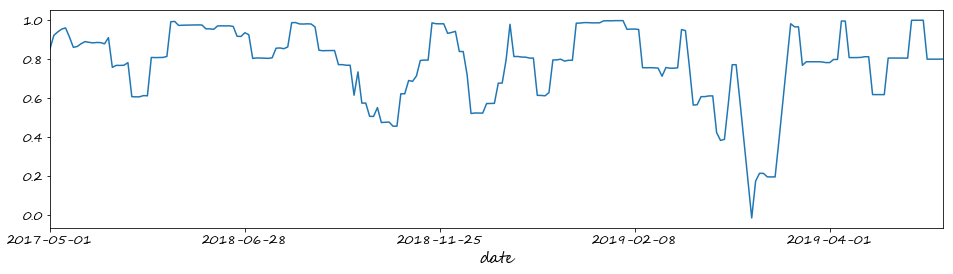

In [78]:
df['score'].loc['2017-05-01':'2019-05-01'].rolling(10,min_periods = 1).mean().plot()

In [35]:
df_p = pd.read_csv('industry_etf_bydate.csv')
df_p['Date'] = df_p['date']
df_p = df_p.set_index('date')
df_p = df_p.drop(['Unnamed: 0'], axis=1)

df_p.head()

,Symbols,open,high,low,close,volume,Date
date,,,,,,,
2015-05-01,DIA,163.1623,163.8906,162.9528,163.7905,3895734,2015-05-01
2015-05-01,IBB,112.1416,114.0600,111.8950,113.8780,7509189,2015-05-01
2015-05-01,IHE,159.5720,161.3193,159.5720,161.2154,52208,2015-05-01
2015-05-01,IVV,193.3584,194.6242,193.2575,194.5600,2983091,2015-05-01
2015-05-01,IYC,137.3856,138.9029,137.3856,138.9029,54411,2015-05-01


In [76]:
d2 = df['score'].loc['2018-05-01':'2019-05-01']
k = pd.merge(d1,d2,how='outer', left_index=True,right_index=True)
date_ = df_p[df_p['Symbols'] == 'SPY']['Date'].loc['2018-05-01':'2019-05-01']
k = pd.merge(k,date_,how='outer', left_index=True,right_index=True)
#k.to_frame
print(k.head())
print(type(k))

               close   score        Date
date                                    
2018-05-01  259.9373  0.9998  2018-05-01
2018-05-02  258.1912     NaN  2018-05-02
2018-05-03  257.6222  0.9980  2018-05-03
2018-05-04  260.9575     NaN  2018-05-04
2018-05-07  261.8404     NaN  2018-05-07
<class 'pandas.core.frame.DataFrame'>


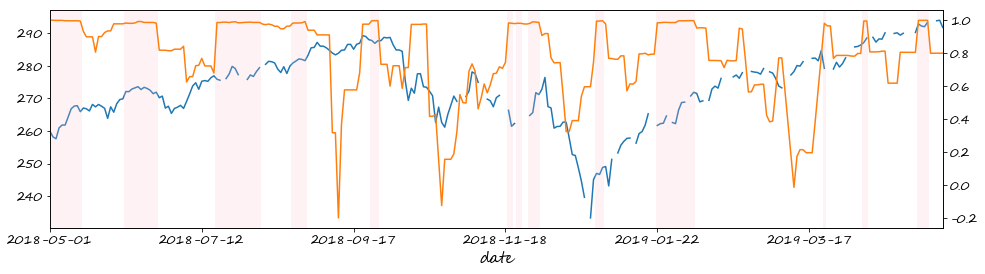

In [79]:
k['close'].plot()
s = k['score'].rolling(10,min_periods = 1).mean()

loc_ = []
for i in s[abs(s)>0.98].index:
    loc_.append(s.index.get_loc(i))

ax = s.plot(secondary_y=True)
def highlight(indices,ax):
    i=0
    while i<len(indices):
        ax.axvspan(indices[i]-0.5, indices[i]+0.5, facecolor='pink', edgecolor='none', alpha=.2)
        i+=1

highlight(loc_, ax)